### IPL Team stats for all seasons

#### All imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim
import folium

from wordcloud import WordCloud
from collections import Counter

import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns

import circlify

### Short names used across the project

In [3]:
df = pd.read_csv("../data/points_table.csv")
short_names = {}

for row in df.iterrows():
    short_names.update({row[1]["name"]:row[1]["short_name"]})
short_names

{'Mumbai Indians': 'MI',
 'Delhi Capitals': 'DC',
 'Sunrisers Hyderabad': 'SRH',
 'Royal Challengers Bangalore': 'RCB',
 'Kolkata Knight Riders': 'KKR',
 'Kings XI Punjab': 'KXIP',
 'Chennai Super Kings': 'CSK',
 'Rajasthan Royals': 'RR',
 'Rising Pune Supergiant': 'RPS',
 'Gujarat Lions': 'GL',
 'Pune Warriors': 'PWI',
 'Deccan Chargers': 'SRH',
 'Kochi Tuskers Kerala': 'Kochi'}

### Team Logos

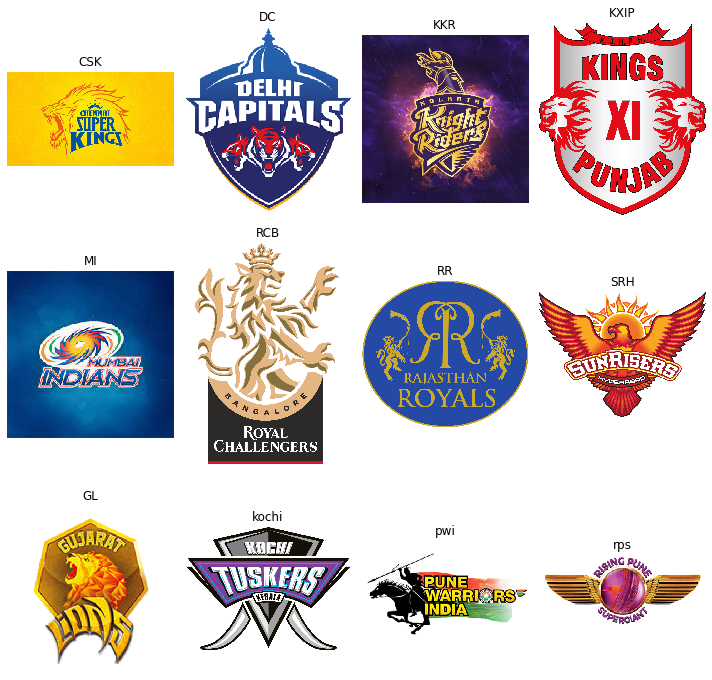

In [4]:
team_logos = {}
team_logos['CSK'] = "../team_logos/csk.jpg"
team_logos['DC'] = "../team_logos/dc.png"
team_logos['KKR'] = "../team_logos/kkr.jpg"
team_logos['KXIP'] = "../team_logos/kxip.png"
team_logos['MI'] = "../team_logos/mi.jpg"
team_logos['RCB'] = "../team_logos/rcb.png"
team_logos['RR'] = "../team_logos/rr.png"
team_logos['SRH'] = "../team_logos/srh.png"
team_logos['GL'] = "../team_logos/gl.png"
team_logos['kochi'] = "../team_logos/kochi.png"
team_logos['pwi'] = "../team_logos/pwi.png"
team_logos['rps'] = "../team_logos/rps.png"

fig = plt.figure(figsize=(5, 5))
fig.set_size_inches(10,10)

plt.subplots_adjust(wspace= 0, hspace= 0)
rows,columns,position = 3, 4, 1
for team in team_logos:
    fig.add_subplot(rows,columns,position)
    image = plt.imread(team_logos[team])
    plt.imshow(image, interpolation='nearest')
    plt.title(team)
    plt.axis('off')
    position+=1
    
plt.tight_layout()

## Locate all the venues 

In [5]:
df = pd.read_csv("../data/all_season_batting_card.csv")

In [6]:
all_venues = df["venue"].unique()

In [7]:
venue_dict = {venue:venue for venue in all_venues}

In [8]:
venue_dict.update({"MA Chidambaram Stadium, Chepauk, Chennai":"MA Chidambaram Stadium, Chennai",
                  "Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh":"Bindra Stadium, Mohali",
                  "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam":"Dr YS Rajasekhara Reddy Cricket Stadium, Visakhapatnam",
                  "Dr DY Patil Sports Academy, Mumbai":"Dr DY Patil Stadium",
                  "Vidarbha Cricket Association Stadium, Jamtha, Nagpur":"Vidarbha Cricket Association Stadium, Nagpur",
                  "The Wanderers Stadium, Johannesburg":"Wanderers Stadium, Johannesburg",
                  "Mangaung Oval, Bloemfontein":"Springbok Park, Bloemfontein" })


In [9]:
venue_dict.values()

dict_values(['Sheikh Zayed Stadium, Abu Dhabi', 'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium', 'MA Chidambaram Stadium, Chennai', 'Eden Gardens, Kolkata', 'Wankhede Stadium, Mumbai', 'Sawai Mansingh Stadium, Jaipur', 'Arun Jaitley Stadium, Delhi', 'M.Chinnaswamy Stadium, Bengaluru', 'Rajiv Gandhi International Stadium, Uppal, Hyderabad', 'Bindra Stadium, Mohali', 'Dr YS Rajasekhara Reddy Cricket Stadium, Visakhapatnam', 'Maharashtra Cricket Association Stadium, Pune', 'Holkar Cricket Stadium, Indore', 'Saurashtra Cricket Association Stadium, Rajkot', 'Green Park, Kanpur', 'Shaheed Veer Narayan Singh International Stadium, Raipur', 'Sardar Patel (Gujarat) Stadium, Motera, Ahmedabad', 'Brabourne Stadium, Mumbai', 'JSCA International Stadium Complex, Ranchi', 'Barabati Stadium, Cuttack', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Nehru Stadium, Kochi', 'Dr DY Patil Stadium', 'Vidarbha Cricket Association Stadium, Nagpur', 'Newlands, Cape Town', "St Geo

In [10]:
loc = Nominatim(user_agent="GetLoc")
  
venue_map = folium.Map(tiles="Stamen Terrain")
# venue_map = folium.Map(tiles="OpenStreetMap")
tooltip = "Click Here For Location"


for venue in venue_dict.values(): 
    getLoc = loc.geocode(venue)
#     print("stadium",venue, getLoc)

    marker = folium.Marker(
        location=[getLoc.latitude, getLoc.longitude],
        popup = venue,
        tooltip=tooltip)
    
    marker.add_to(venue_map)
venue_map.save(outfile= "../images/all_venues.html")
venue_map

## Home Grounds for each team

In [11]:
df = pd.read_csv("../data/all_season_summary.csv")
df = df.loc[~df['home_team'].isin(["Kochi", "PWI", "RPS", "GL"])]
df = df.loc[~df['away_team'].isin(["Kochi", "PWI", "RPS", "GL"])]
df = df[df["season"]==2008]
home_grounds = {}
for row in df.iterrows():
    row_data= row[1]
    if row_data['home_team'] not in home_grounds:
        home_grounds.update({row_data['home_team']:venue_dict[row_data['venue_name']]})
print(home_grounds)

{'RCB': 'M.Chinnaswamy Stadium, Bengaluru', 'KXIP': 'Bindra Stadium, Mohali', 'DC': 'Arun Jaitley Stadium, Delhi', 'KKR': 'Eden Gardens, Kolkata', 'MI': 'Wankhede Stadium, Mumbai', 'RR': 'Sawai Mansingh Stadium, Jaipur', 'SRH': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad', 'CSK': 'MA Chidambaram Stadium, Chennai'}


In [12]:
loc = Nominatim(user_agent="GetLoc")
  
home_grounds_map = folium.Map(tiles="OpenStreetMap")
# venue_map = folium.Map(tiles="Stamen Terrain")
tooltip = "Click Here For Location"

for team, venue in home_grounds.items(): 
    print(team_logos[team], type(team_logos[team]))
    getLoc = loc.geocode(venue)
    icon = folium.features.CustomIcon(team_logos[team],
                                          icon_size=(50, 50))
    marker = folium.Marker(
        location=[getLoc.latitude, getLoc.longitude],
        popup = venue,
#         icon=folium.DivIcon(html=f"""<html><img src={team_logos[team]} alt={team}></html>"""),
        icon=icon,
        tooltip=team)
    marker.add_to(home_grounds_map)
home_grounds_map.save(outfile= "../images/home_grounds.html")
# home_grounds_map.save(outfile= "../images/home_grounds.jgp")
home_grounds_map

../team_logos/rcb.png <class 'str'>
../team_logos/kxip.png <class 'str'>
../team_logos/dc.png <class 'str'>
../team_logos/kkr.jpg <class 'str'>
../team_logos/mi.jpg <class 'str'>
../team_logos/rr.png <class 'str'>
../team_logos/srh.png <class 'str'>
../team_logos/csk.jpg <class 'str'>


## Succussful Venue for Defending or Chasing

In [13]:
season_summary = pd.read_csv("../data/all_season_summary.csv")

venue_dict = {}
for row, data in season_summary.iterrows():
    if data['venue_name'] not in venue_dict:
        venue_dict[data['venue_name']] = {"successful_chased":0,"successful_defended":0 }
    if data['decision'] =='BOWL FIRST':
        if data['winner']==data['toss_won']:
            venue_dict[data['venue_name']]['successful_chased']+=1
        else:
            venue_dict[data['venue_name']]['successful_defended']+=1
    if data['decision'] =='BAT FIRST':
        if data['winner']==data['toss_won']:
            venue_dict[data['venue_name']]['successful_defended']+=1
        else:
            venue_dict[data['venue_name']]['successful_chased']+=1
            
for venue, data in season_summary.groupby('venue_name'):
    venue_dict[venue]['total_matches_played'] = len(data)
    venue_dict[venue]['successful_chase_percent'] = (venue_dict[venue]['successful_chased'] * 100)/len(data)
    venue_dict[venue]['successful_defend_percent'] = (venue_dict[venue]['successful_defended'] * 100)/len(data)
venue_data = pd.DataFrame(venue_dict)
venue_data = venue_data.T
venue_data

,successful_chased,successful_defended,total_matches_played,successful_chase_percent,successful_defend_percent
"Sheikh Zayed Stadium, Abu Dhabi",16.0,13.0,29.0,55.172414,44.827586
Dubai International Cricket Stadium,14.0,19.0,33.0,42.424242,57.575758
Sharjah Cricket Stadium,11.0,7.0,18.0,61.111111,38.888889
"MA Chidambaram Stadium, Chepauk, Chennai",22.0,35.0,57.0,38.596491,61.403509
"Eden Gardens, Kolkata",47.0,30.0,79.0,59.493671,37.974684
"Wankhede Stadium, Mumbai",37.0,36.0,73.0,50.684932,49.315068
"Sawai Mansingh Stadium, Jaipur",32.0,15.0,47.0,68.085106,31.914894
"Arun Jaitley Stadium, Delhi",40.0,34.0,75.0,53.333333,45.333333
"M.Chinnaswamy Stadium, Bengaluru",44.0,37.0,83.0,53.012048,44.578313
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",37.0,27.0,64.0,57.812500,42.187500


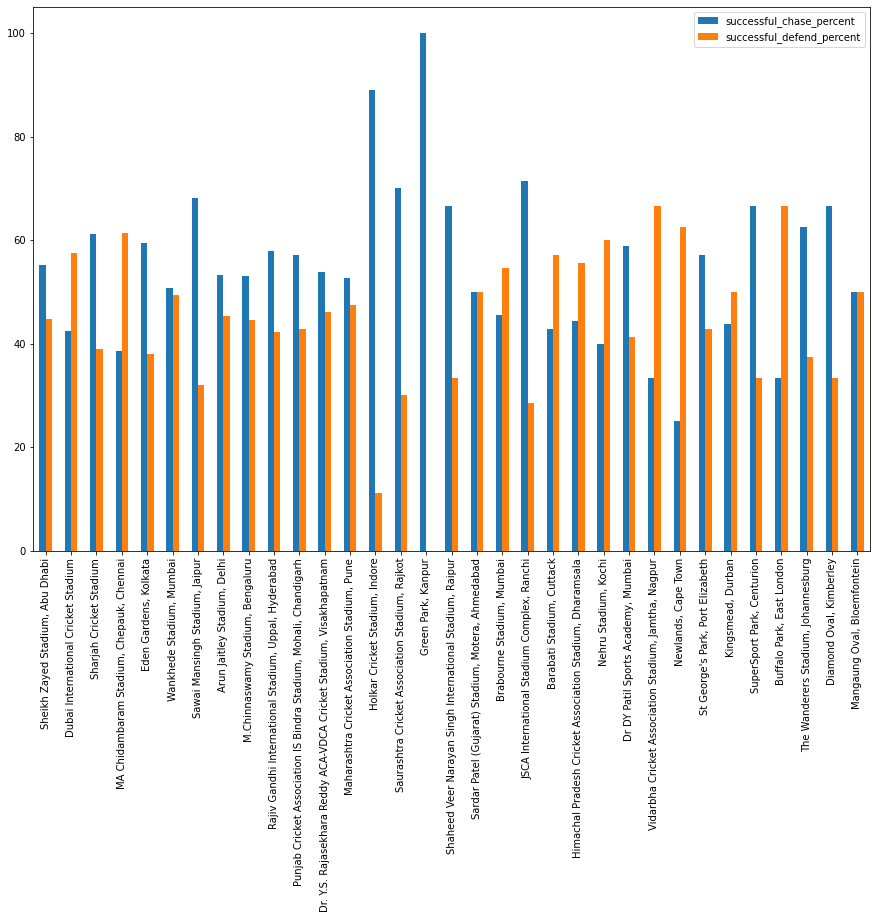

In [14]:
updated_data = venue_data[['successful_chase_percent' ,'successful_defend_percent']]
ax = updated_data.plot.bar(figsize=(15,10))


In [15]:
venue_data = venue_data[venue_data['total_matches_played']>15]
venue_data

,successful_chased,successful_defended,total_matches_played,successful_chase_percent,successful_defend_percent
"Sheikh Zayed Stadium, Abu Dhabi",16.0,13.0,29.0,55.172414,44.827586
Dubai International Cricket Stadium,14.0,19.0,33.0,42.424242,57.575758
Sharjah Cricket Stadium,11.0,7.0,18.0,61.111111,38.888889
"MA Chidambaram Stadium, Chepauk, Chennai",22.0,35.0,57.0,38.596491,61.403509
"Eden Gardens, Kolkata",47.0,30.0,79.0,59.493671,37.974684
"Wankhede Stadium, Mumbai",37.0,36.0,73.0,50.684932,49.315068
"Sawai Mansingh Stadium, Jaipur",32.0,15.0,47.0,68.085106,31.914894
"Arun Jaitley Stadium, Delhi",40.0,34.0,75.0,53.333333,45.333333
"M.Chinnaswamy Stadium, Bengaluru",44.0,37.0,83.0,53.012048,44.578313
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",37.0,27.0,64.0,57.812500,42.187500


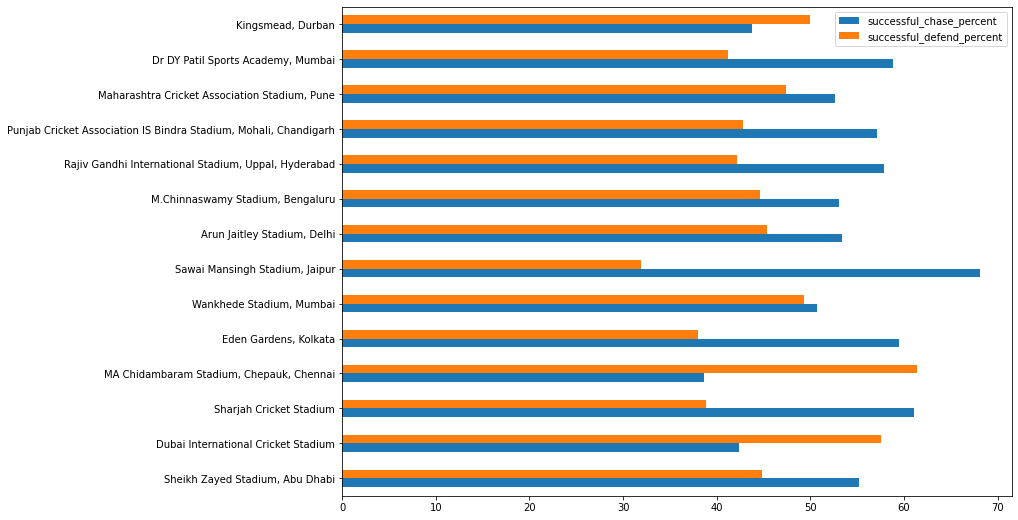

In [21]:
updated_data = venue_data[['successful_chase_percent' ,'successful_defend_percent']]
ax = updated_data.plot.barh(figsize=(12,9))